# Working with Time Series

## Dates and Times in Python

### Native Pythobn dates an times:datetime and dateutil

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [6]:
date = parser.parse("2015-04-05")
date

datetime.datetime(2015, 4, 5, 0, 0)

In [7]:
#day of week
date.strftime('%A')

'Sunday'

### Typed arrays of times:Numpy's datetime64

In [8]:
import numpy as np
date = np.array('2015-07-05',dtype = np.datetime64)
date

array(datetime.date(2015, 7, 5), dtype='datetime64[D]')

In [10]:
date +np.arange(12)

array(['2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
       '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
       '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16'], dtype='datetime64[D]')

In [11]:
np.datetime64('2015-06-07')

numpy.datetime64('2015-06-07')

In [14]:
np.datetime64('2015-08-09 12:00')

numpy.datetime64('2015-08-09T12:00')

In [15]:
np.datetime64('2015-08-09 12:59:59.50','ns')

numpy.datetime64('2015-08-09T12:59:59.500000000')

### Dates and times in Pandas:Best of both worlds

In [19]:
import pandas as pd
date = pd.to_datetime("4th of July ,2015")
date

Timestamp('2015-07-04 00:00:00')

In [22]:
#day of week
date.strftime('%A')

'Saturday'

In [23]:
date +pd.to_timedelta(np.arange(12),'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series:Indexing by Time 

In [24]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [26]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [28]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures     

timestamps:Timestamp    
time perios:Period    
time detals:Timedelta    

In [29]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [30]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='int64', freq='D')

In [31]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences:pd.date_range()

In [33]:
pd.date_range('2015-07-04','2015-09-08')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15',
               '2015-07-16', '2015-07-17', '2015-07-18', '2015-07-19',
               '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23',
               '2015-07-24', '2015-07-25', '2015-07-26', '2015-07-27',
               '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31',
               '2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
      

In [34]:
pd.date_range('2015-06-07',periods=9)

DatetimeIndex(['2015-06-07', '2015-06-08', '2015-06-09', '2015-06-10',
               '2015-06-11', '2015-06-12', '2015-06-13', '2015-06-14',
               '2015-06-15'],
              dtype='datetime64[ns]', freq='D')

In [41]:
pd.date_range('2015-06-07',periods=9,freq='BM')

DatetimeIndex(['2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30',
               '2015-10-30', '2015-11-30', '2015-12-31', '2016-01-29',
               '2016-02-29'],
              dtype='datetime64[ns]', freq='BM')

In [40]:
pd.timedelta_range(0,periods=10,freq='min')

TimedeltaIndex(['00:00:00', '00:01:00', '00:02:00', '00:03:00', '00:04:00',
                '00:05:00', '00:06:00', '00:07:00', '00:08:00', '00:09:00'],
               dtype='timedelta64[ns]', freq='T')

## Frequencies and Offsets 

In [42]:
pd.timedelta_range(0,periods=9,freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [43]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01',periods=5,freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Resampling,Shifting,and Windowing

In [46]:
from pandas_datareader import data
goog = data.DataReader('GOOG',start='2004',end='2016',data_source ='yahoo')
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [47]:
goog = goog['Close']

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;
seaborn.set()

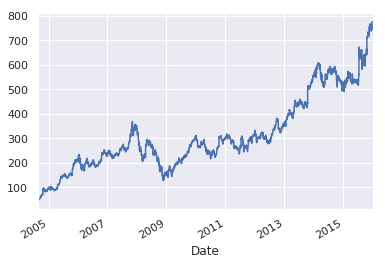

In [49]:
goog.plot()

### Resampling and converting frequencies

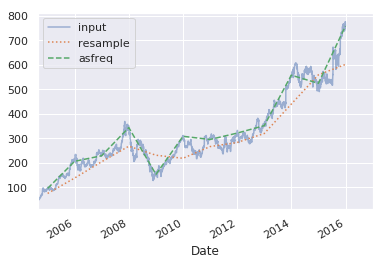

In [52]:
goog.plot(alpha=0.5,style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input','resample','asfreq'],loc='upper left')

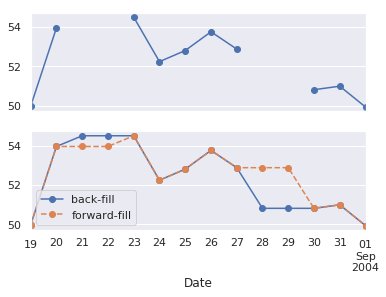

In [53]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

### Time-Shifts

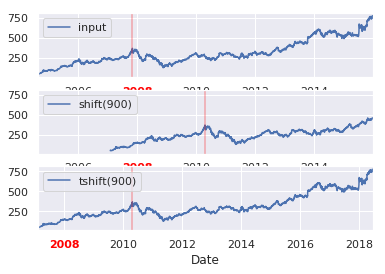

In [54]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

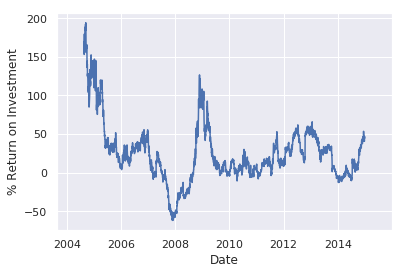

In [55]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

### Rolling windows

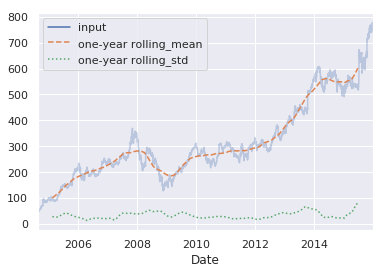

In [56]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

#  Example：Visualizing Seattle Bicycle Counts

In [57]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1679k    0 1679k    0     0   299k      0 --:--:--  0:00:05 --:--:--  353k


In [58]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0
2019-01-01 04:00:00,2.0,1.0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59832 entries, 2019-01-01 00:00:00 to 2017-05-24 01:00:00
Data columns (total 2 columns):
Fremont Bridge East Sidewalk    59823 non-null float64
Fremont Bridge West Sidewalk    59823 non-null float64
dtypes: float64(2)
memory usage: 1.4 MB


In [60]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [61]:
data.dropna().describe()

,West,East,Total
count,59823.000000,59823.000000,59823.000000
mean,52.619795,60.262324,112.882119
std,67.734326,87.871363,143.101423
min,0.000000,0.000000,0.000000
25%,6.500000,7.000000,15.000000
50%,29.000000,30.000000,61.000000
75%,70.000000,73.000000,147.000000
max,698.000000,850.000000,1097.000000


## Visualizing the data

In [62]:
%matplotlib inline
import seaborn; seaborn.set()

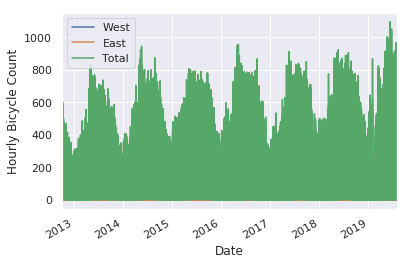

In [66]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

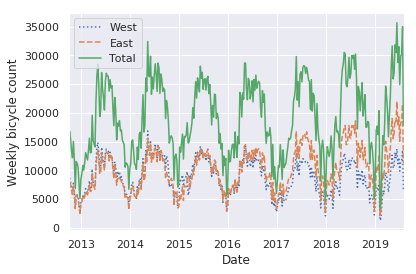

In [68]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

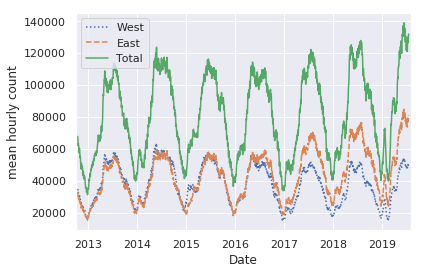

In [69]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

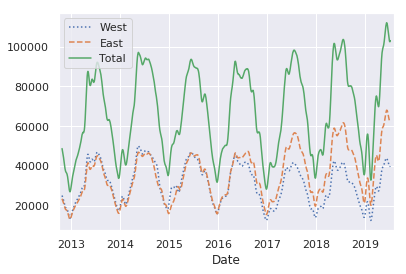

In [70]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

## Digging into the data

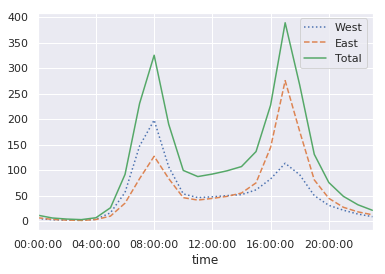

In [71]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

In [73]:
by_time

,West,East,Total
00:00:00,5.030084,6.699960,11.730044
01:00:00,2.817489,3.391897,6.209386
02:00:00,1.983521,2.100080,4.083601
03:00:00,1.557561,1.442439,3.000000
04:00:00,3.553149,3.114320,6.667469
05:00:00,16.375852,9.915363,26.291215
06:00:00,56.401925,35.307661,91.709587
07:00:00,147.443642,83.363016,230.806659
08:00:00,198.112716,127.178500,325.291215
09:00:00,106.482343,83.455056,189.937400


In [74]:
hourly_ticks

array([    0, 14400, 28800, 43200, 57600, 72000])

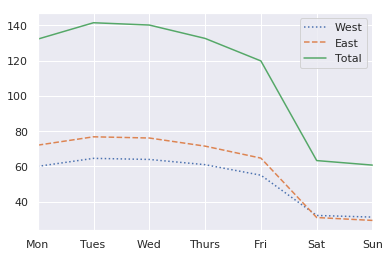

In [75]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [76]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
print(weekend)
by_time = data.groupby([weekend, data.index.time]).mean()

['Weekday' 'Weekday' 'Weekday' ..., 'Weekday' 'Weekday' 'Weekday']
